In [1]:
import numpy as np
import pandas as pd

In [2]:
def load_data():
    file = 'bakerysales.csv'
    df = pd.read_csv(file)
    return df
df = load_data()

In [3]:
df

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"
...,...,...,...,...,...,...,...
234000,511387,2022-09-30,18:52,288911.0,COUPE,1.0,"0,15 €"
234001,511388,2022-09-30,18:52,288911.0,BOULE 200G,1.0,"1,20 €"
234002,511389,2022-09-30,18:52,288911.0,COUPE,2.0,"0,15 €"
234003,511392,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,"1,30 €"


In [4]:
df.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [5]:
# rename column
df.columns

Index(['Unnamed: 0', 'date', 'time', 'ticket_number', 'article', 'Quantity',
       'unit_price'],
      dtype='object')

In [6]:
df.rename(columns = {'unnamed: 0': 'id',
                     'article':'Product',
                     'Quantity':'quantity'},
                     inplace=True)

In [7]:
df.unit_price


0         0,90 €
1         1,20 €
2         1,20 €
3         1,15 €
4         1,20 €
           ...  
234000    0,15 €
234001    1,20 €
234002    0,15 €
234003    1,30 €
234004    1,30 €
Name: unit_price, Length: 234005, dtype: object

In [8]:
# clean the unit price column
# replace the comma and remove the currency symbol
df.unit_price.str.replace(",",".").str.replace("€","")


0         0.90 
1         1.20 
2         1.20 
3         1.15 
4         1.20 
          ...  
234000    0.15 
234001    1.20 
234002    0.15 
234003    1.30 
234004    1.30 
Name: unit_price, Length: 234005, dtype: object

In [9]:

df.unit_price = df.unit_price.str.replace(",",".").str.replace("€","").str.strip()


In [10]:
type(df.unit_price[0])

str

In [11]:
# The values are still in the string type
# so we can covert to float
df.unit_price = df.unit_price.astype('float')

## Reasearch questions on Bakery sales data

1. How does sales volume vary over time (data) ?

2. What is the average unit price for each product ?

3. is there a correlation between unit price and total sales ?

4. is there a pattern in sales based on the date or the time of purchase?

5. how does the quantity sold vary over time ?

6. what is the contribution of each product to the total revenue ?

7. do we have a frequent buyer based on the ticket numbers ?

8. which articles have the lowest or highest sale ?

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   Product        234005 non-null  object 
 5   quantity       234005 non-null  float64
 6   unit_price     234005 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 12.5+ MB


In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     234005 non-null  int64         
 1   date           234005 non-null  datetime64[ns]
 2   time           234005 non-null  object        
 3   ticket_number  234005 non-null  float64       
 4   Product        234005 non-null  object        
 5   quantity       234005 non-null  float64       
 6   unit_price     234005 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 12.5+ MB


In [15]:
df['sales'] = df.quantity * df.unit_price

In [16]:
daily_sales = df.groupby('date')['sales'].sum()

In [17]:
daily_sales

date
2021-01-02     987.85
2021-01-03    1014.30
2021-01-04     461.90
2021-01-05     515.70
2021-01-07     544.00
               ...   
2022-09-26     693.75
2022-09-27     746.45
2022-09-28     610.70
2022-09-29     689.20
2022-09-30     795.95
Name: sales, Length: 600, dtype: float64

In [18]:
daily_sales_df = daily_sales.reset_index().rename(columns={'sales':"total sales"})

In [19]:
daily_sales_df

,date,total sales
0,2021-01-02,987.85
1,2021-01-03,1014.30
2,2021-01-04,461.90
3,2021-01-05,515.70
4,2021-01-07,544.00
...,...,...
595,2022-09-26,693.75
596,2022-09-27,746.45
597,2022-09-28,610.70
598,2022-09-29,689.20


In [20]:
import matplotlib.pyplot as plt

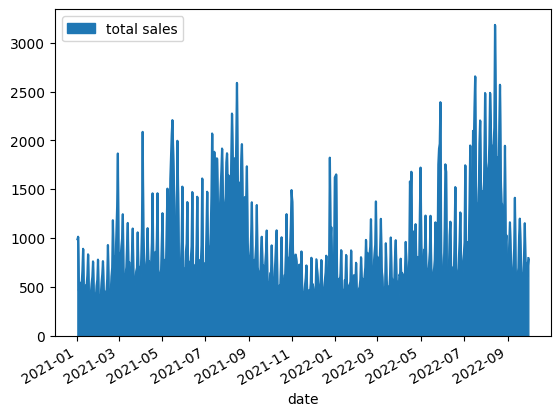

In [21]:
# draw a line chart

ax = daily_sales_df.plot.area(x='date',
                            y='total sales')

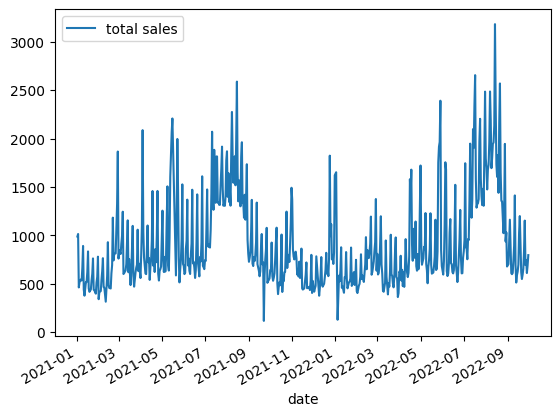

In [22]:
# draw a line chart

ax = daily_sales_df.plot(x='date',
                            y='total sales')

In [23]:
# for quantity
daily_qty_sold = df.groupby('date')['quantity'].sum()
daily_qty_sold


date
2021-01-02    581.0
2021-01-03    564.0
2021-01-04    315.0
2021-01-05    309.0
2021-01-07    310.0
              ...  
2022-09-26    399.0
2022-09-27    423.0
2022-09-28    357.0
2022-09-29    428.0
2022-09-30    503.0
Name: quantity, Length: 600, dtype: float64

In [24]:
daily_qty_sold_df = daily_qty_sold.reset_index().rename(columns={'quantity':"total qty"})
daily_qty_sold_df

,date,total qty
0,2021-01-02,581.0
1,2021-01-03,564.0
2,2021-01-04,315.0
3,2021-01-05,309.0
4,2021-01-07,310.0
...,...,...
595,2022-09-26,399.0
596,2022-09-27,423.0
597,2022-09-28,357.0
598,2022-09-29,428.0


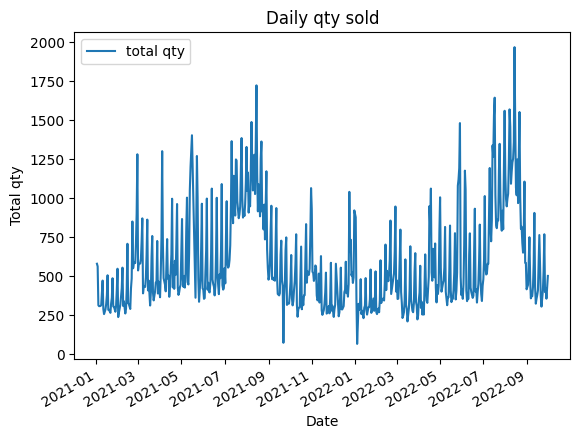

In [25]:
daily_qty_sold_df.plot(x='date',y='total qty')
plt.title('Daily qty sold')
plt.xlabel('Date')
plt.ylabel('Total qty')
plt.show()




In [26]:
# price analysis
# Average price
avg_price_per_prdt = df.groupby('Product')['unit_price'].mean()

In [27]:
# top values
avg_price_per_prdt.sort_values(ascending=False)

Product
PLAQUE TARTE 25P    35.000000
BUCHE 8PERS         28.000000
BUCHE 6PERS         21.000000
TARTE FRAISE 6P     19.512000
ROYAL 6P            18.967742
                      ...    
DEMI BAGUETTE        0.470367
SUCETTE              0.300000
COUPE                0.150000
.                    0.000000
ARTICLE 295          0.000000
Name: unit_price, Length: 149, dtype: float64

In [28]:
# correlation btw price and sales
corr = df['unit_price'].corr(df['sales'])
print(f"Correlation btwn unit price and sales: {corr} ")

Correlation btwn unit price and sales: 0.6905308951057988 


In [29]:
# top ticket numbers
top_tickets = df['ticket_number'].value_counts()
top_tickets.head(10)

ticket_number
225766.0    13
202116.0    12
155163.0    12
241088.0    12
227073.0    12
160751.0    12
199889.0    11
239966.0    11
281951.0    11
242118.0    11
Name: count, dtype: int64